In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

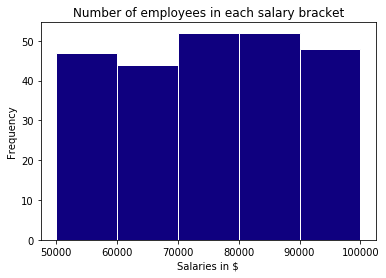

In [2]:
path = 'IL_employee_salary.csv'

#read csv file into a dataframe and remove all NaN values
file = pd.read_csv(path).dropna()
salary_df = file['Annual Salary']

salaries = [] #array containing all salaries as 'int'
for salary in salary_df:
    salary = salary.partition(',')
    salary = int(salary[0][1:]+salary[2].rstrip())
    salaries.append(salary)

#find the max and min bin value
bin_min, bin_max = (min(salaries)//1000)*1000, ((max(salaries)//1000)+1)*1000


interval = 10000 #defines the interval for x-axis
bins = [] #array to store bins of the histogram
interval_start = bin_min
for index in range(((bin_max-bin_min)//interval) + 1):
    bins.append(interval_start)
    interval_start += 10000

#plot histogram using values of salaries
salaries = np.array(salaries)
salary_freq, bins, patches = plt.hist(salaries, bins = bins, facecolor='#0F007F', edgecolor='white')
plt.xlabel('Salaries in \$')
plt.ylabel('Frequency')
plt.title('Number of employees in each salary bracket')
plt.show()


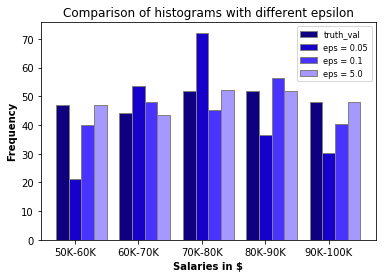

In [43]:
# np.random.seed(123)
loc = 0.
epsilon_input = [0.05, 0.1, 5.0]
eps_freq = []

#Here, sensitivity is 1
for eps in epsilon_input:
    scale = 1/eps 
    noise = np.random.laplace(loc, scale, len(bins)-1)
    
    salary_freq_copy = salary_freq.copy()
    for index in range(len(salary_freq_copy)):
        salary_freq_copy[index] += noise[index]
    eps_freq.append(salary_freq_copy)

barWidth = 0.20
eps0 = salary_freq.copy()
eps1 = eps_freq[0]
eps2 = eps_freq[1]
eps3 = eps_freq[2]

r1 = np.arange(len(eps0))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

plt.bar(r1, eps0, color='#0F007F', width=barWidth, edgecolor='grey', label = 'truth_val')
plt.bar(r2, eps1, color='#1800CC', width=barWidth, edgecolor='grey', label = 'eps = 0.05')
plt.bar(r3, eps2, color='#4B33FF', width=barWidth, edgecolor='grey', label = 'eps = 0.1')
plt.bar(r4, eps3, color='#A599FF', width=barWidth, edgecolor='grey', label = 'eps = 5.0')

plt.title('Comparison of histograms with different epsilon')
plt.ylabel('Frequency', fontweight = 'bold')
plt.xlabel('Salaries in \$', fontweight='bold')
intrvl1 = str(bins[0]//1000)+'K'+'-'+str(bins[1]//1000)+'K'
intrvl2 = str(bins[1]//1000)+'K'+'-'+str(bins[2]//1000)+'K'
intrvl3 = str(bins[2]//1000)+'K'+'-'+str(bins[3]//1000)+'K'
intrvl4 = str(bins[3]//1000)+'K'+'-'+str(bins[4]//1000)+'K'
intrvl5 = str(bins[4]//1000)+'K'+'-'+str(bins[5]//1000)+'K'

plt.xticks([r + barWidth for r in range(len(eps1))], [intrvl1, intrvl2,intrvl3,intrvl4,intrvl5 ])
plt.legend(loc=1, prop={'size': 8.25})
plt.show()
